<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
# First splitting the data into two, where 1 will be used for testing
# Other will be used again to CV and train the model

# splitting data into 80:20 ==> 80(train+CV), 20(Test set)
x1,x_test,y1,y_test = train_test_split(X,y,test_size=0.2,random_state=15)
# splitting data into 75:25 ==> 80(train+CV), 20(Test set)
x_train,x_cv,y_train,y_cv = train_test_split(x1,y1,test_size=0.25,random_state=15)
x_train.shape,x_cv.shape,x_test.shape

((3000, 5), (1000, 5), (1000, 5))

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [4]:
# you can write your code here
model = SVC(gamma=0.001, C=100) # Not defining explicitly as by default kernel will be RBF
model.fit(x_train,y_train)
gamma=0.001
intercept = model.intercept_ # intercept term
svs = model.support_vectors_ # will give the support vectors length of data points
dual_coef = model.dual_coef_ # will have product of y_i*alpha_i

def decision_function(x_cv,intercept,svs,dual_coef,gamma):
    fcv=[]
    for xq in x_cv: # xq is the query point from the CV dataset     
        temp=0
        for i in range(len(svs)):
            # Ref for L2 norm: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
            l2_norm = np.linalg.norm(svs[i,:]-xq)
            temp+= (dual_coef[0,i]*np.exp(-1*gamma*(l2_norm**2)))
        temp+=intercept
        fcv.append(temp[0])
    return np.array(fcv)

fcv = decision_function(x_cv,intercept,svs,dual_coef,gamma)
fcv

array([ 9.78553590e-01, -1.11760405e+00, -2.04720532e+00, -3.09565428e+00,
       -2.79889732e+00, -3.19223178e+00, -3.06506013e+00, -2.65326082e+00,
        3.33031294e+00, -1.27804286e+00,  1.23713395e+00, -2.26620102e+00,
        1.15545642e+00,  1.55336237e+00, -3.18756150e-01,  1.20293177e+00,
        1.88290414e+00,  1.19637781e+00, -2.78451489e-01, -2.12325762e+00,
        1.96221487e+00, -4.75759780e-01,  1.08589552e+00, -2.55752818e+00,
       -2.89278575e+00, -2.43600679e+00, -3.82456176e+00, -2.45783486e+00,
       -2.27106674e+00, -1.23683699e+00, -1.16338685e+00, -2.10126553e+00,
       -1.80723683e+00, -2.97522570e+00, -1.78272899e+00, -2.57605838e+00,
        1.08577450e+00, -1.38072948e-01, -2.30545739e+00, -2.29909830e+00,
        7.42068597e-01, -2.97019249e+00, -2.90071729e+00,  1.41309686e+00,
        2.78861618e+00, -1.89767766e+00, -1.98425643e+00, -1.45561992e+00,
       -2.89596097e+00, -2.67027549e+00, -2.39828370e+00, -3.04643574e+00,
       -1.56860504e+00,  

In [5]:
model.decision_function(x_cv)

array([ 9.78553590e-01, -1.11760405e+00, -2.04720532e+00, -3.09565428e+00,
       -2.79889732e+00, -3.19223178e+00, -3.06506013e+00, -2.65326082e+00,
        3.33031294e+00, -1.27804286e+00,  1.23713395e+00, -2.26620102e+00,
        1.15545642e+00,  1.55336237e+00, -3.18756150e-01,  1.20293177e+00,
        1.88290414e+00,  1.19637781e+00, -2.78451489e-01, -2.12325762e+00,
        1.96221487e+00, -4.75759780e-01,  1.08589552e+00, -2.55752818e+00,
       -2.89278575e+00, -2.43600679e+00, -3.82456176e+00, -2.45783486e+00,
       -2.27106674e+00, -1.23683699e+00, -1.16338685e+00, -2.10126553e+00,
       -1.80723683e+00, -2.97522570e+00, -1.78272899e+00, -2.57605838e+00,
        1.08577450e+00, -1.38072948e-01, -2.30545739e+00, -2.29909830e+00,
        7.42068597e-01, -2.97019249e+00, -2.90071729e+00,  1.41309686e+00,
        2.78861618e+00, -1.89767766e+00, -1.98425643e+00, -1.45561992e+00,
       -2.89596097e+00, -2.67027549e+00, -2.39828370e+00, -3.04643574e+00,
       -1.56860504e+00,  

**Observations:**<br>
*Clearly both the decision functions implemented from the scratch and came from the model are same*

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__

In [6]:
y_cv_mod = []
pos_sam = list(y_train).count(1) # no.of.positive_samples in Train data set
neg_sam = list(y_train).count(0) # no.of.negative_samples in Train data set
y_pos = (pos_sam+1)/(pos_sam+2)
y_neg = 1/(neg_sam+2)
for i in y_cv:
    if(i==1):
        y_cv_mod.append(y_pos)
    elif(i==0):
        y_cv_mod.append(y_neg)
len(y_cv_mod)

1000

In [7]:
list(y_cv).count(1),list(y_cv).count(0)

(288, 712)

In [8]:
## Declaring necessary functions: ##
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b = 0
    return w,b

def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y-sigmoid(np.dot(w,x)+b)
    return db

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y-sigmoid(np.dot(w,x)+b)) - (alpha/N)*w
    return dw

def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss = 0
    n = len(y_true)
    for i,j in zip(y_true,y_pred):
        loss += ((i*np.log10(j))+((1-i)*np.log10(1-j)))
    loss = loss*(-1/n)
    return loss

def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))
    return sig

def train(X_train,y_train,epochs,alpha,eta0,N): 
    # X_train = output from the decision function(in general output of the model built in train stage)
    # y_train = actual class labels in the given data
    ''' In this function, we will implement logistic regression through SGD classifier
        to get optimal values for w and b'''
    w,b = initialize_weights(X_train[0]) # Initialising with a random value to start with 
    train_losses = []
    weights = []
    intercepts = []
    for epoch in range(epochs): # looping through epochs as to get very very optimal value for w
        y_pred = []
        for i in range(len(X_train)):
            grad_w = gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
            grad_b = gradient_db(X_train[i],y_train[i],w,b)
            w = w + (eta0*grad_w)
            b = b + (eta0*grad_b)
        for i in range(len(X_train)):
            temp = sigmoid(np.dot(w,X_train[i])+b)
            y_pred.append(temp)
        train_loss = logloss(y_train,y_pred)
        train_losses.append(train_loss)      
        weights.append(w)
        intercepts.append(b)
    return w,b,train_losses,weights,intercepts

alpha=0.0001 # constant that multiplies reg.term(as per notes it is lambda)
eta0=0.0001 # learning rate
N=len(fcv) # length of the set passed for training
epochs=50
w,b,train_losses,weights,intercepts=train(fcv,y_cv_mod,epochs,alpha,eta0,N)

In [9]:
diff = [train_losses[i - 1]-x for i, x in enumerate(train_losses)][1:]
for i,j in enumerate(diff):
    if j<0.001: #assuming that at a diff of 0.001 there wont be much change
        flag = i+1
        break
w,b = weights[flag],intercepts[flag] #best_w,best_b

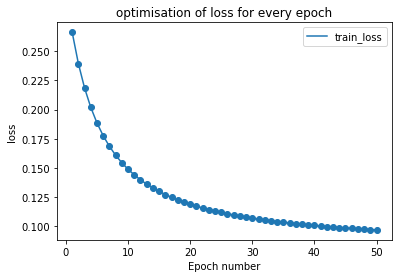

In [10]:
import matplotlib.pyplot as plt

e = list(range(1,51))
plt.plot(e,train_losses,label="train_loss")
plt.scatter(e,train_losses)
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.title("optimisation of loss for every epoch")
plt.show()

In [11]:
ftest = decision_function(x_test,intercept,svs,dual_coef,gamma)
# here ftest is used because we have trained on CV data and got the optimal values for both w and b
# now we have to predict for test data using simoid calibrator
# so only we are using x_test data for predicting the y value

In [12]:
# now y_test points will be found through w,b camefrom the optimisation function
y_calib = []
y_calib_final = []
for i in ftest:
    y_calib.append(1/(np.exp((-1*w*i)+b)))
# As we are using sigmoid function we know that <0.5 will be having probability less than 0.5
# which inturn means output = 0
# where as if its greater than 0.5 then output = 1

for i in y_calib:
    if(i>=0.5):
        y_calib_final.append(1)
    else:
        y_calib_final.append(0)

# Applying the same logic here and seeing the difference between actual_y_test and calibrated_y_test
summ = 0
for i in range(1000):
    summ+= abs(y_calib_final[i]- list(y_test)[i])

generalisation_accuracy = (1-(summ/1000))*100
print("The generalisation accuracy is:", generalisation_accuracy)

The generalisation accuracy is: 92.2



If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
